# Stats - frequency and intensity, annual

$$
z_{frequency} = \frac{z_{f}}{z_{f_{hist}}}, \quad
z_{f} = \displaystyle\sum_{y=1}^{30} \left(
\begin{cases}
0 & \quad (\bar{x}_y - P_{10_{hist}}) \geq 0 \\
1 & \quad (\bar{x}_y - P_{10_{hist}}) < 0
\end{cases} \right)
$$

$$
z_{intensity} =
\frac{1}{30} \displaystyle\sum_{y=1}^{30} \left(
\begin{cases}
0 & \quad (\bar{x}_y - P_{10_{hist}}) \geq 0 \\
-\frac{\bar{x}_y - P_{10_{hist}}}{\sigma_{hist}} & \quad (\bar{x}_y - P_{10_{hist}}) < 0
\end{cases} \right)
$$

- calculate annual means (or seasonal means for each year)
- calculate the historical 10th percentile and standard deviation from the annual means
- calculate frequency and severity
- ensemble reduction

In [1]:
import importlib
import matplotlib.pyplot as plt
import climag.climag as cplt
import seaborn as sns
import geopandas as gpd
import os

In [2]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)

In [3]:
def plot_heatmap(dataset, model=0, rlat=15, rlon=15):
    for v in list(dataset.data_vars):
        dataset_df = (
            dataset.isel(model=model, rlat=rlat, rlon=rlon)[v]
            .to_dataframe()[[v]]
            .dropna()
            .reset_index()
            .pivot(index="exp", columns="year", values=v)
        )
        plt.figure(figsize=(15, 5))
        sns.heatmap(dataset_df, xticklabels=True, cmap="RdPu")
        plt.title(v)
        plt.tight_layout()
        plt.show()

In [13]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [4]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


### Difference in the interannual mean of standing biomass and the historical 10th percentile

In [5]:
ds_ec_anom, ds_ec_freq, ds_ec_freq_norm, ds_ec_int, ds_ec_int_std = cplt.calc_event_frequency_intensity(
    ds_ec, skipna=True
)
# ds_ec_freq = ds_ec_freq.drop_vars(["bm_c"])
# ds_ec_int = ds_ec_int.drop_vars(["bm_c"])

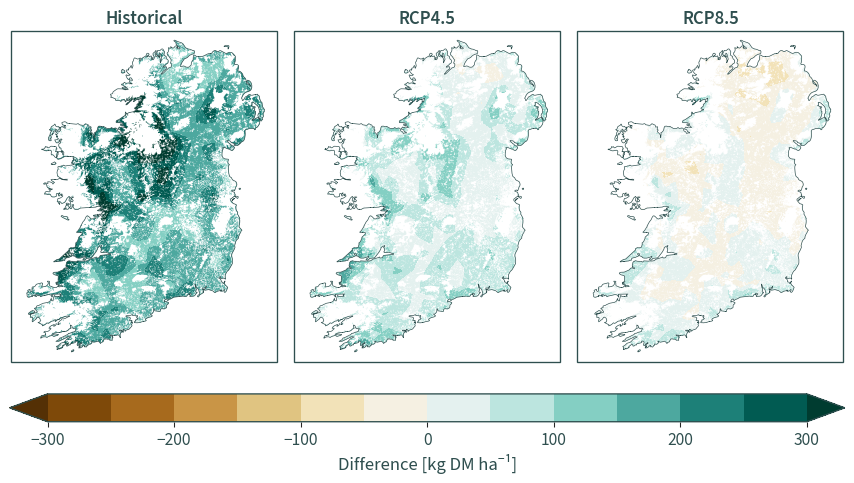

In [8]:
cplt.plot_stats(ds_ec_anom.mean(dim="year", skipna=True).mean(dim="model", skipna=True)["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Difference [kg DM ha⁻¹]")

#### Frequency of the interannual mean of standing biomass falling below the historical 10th percentile

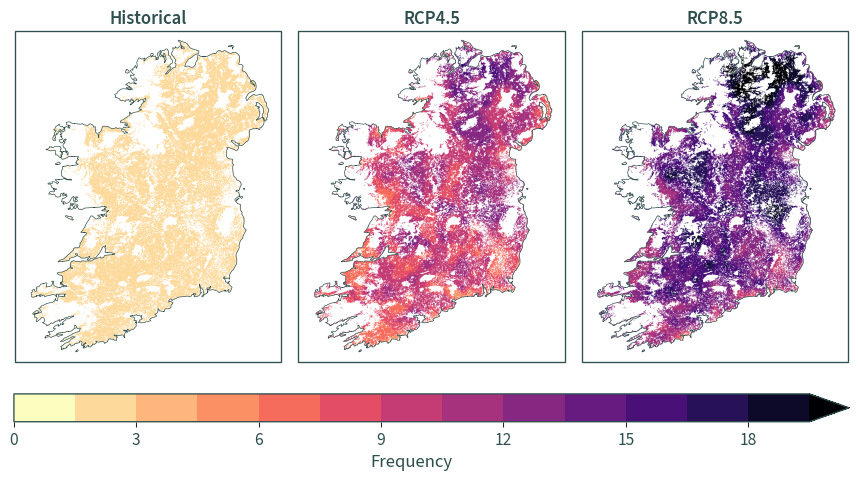

In [9]:
cplt.plot_stats(ds_ec_freq.mean(dim="model", skipna=True)["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Frequency", cmap="magma_r", extend="max")

#### Frequency of the interannual mean of standing biomass falling below the historical 10th percentile, normalised using the frequency for the historical period

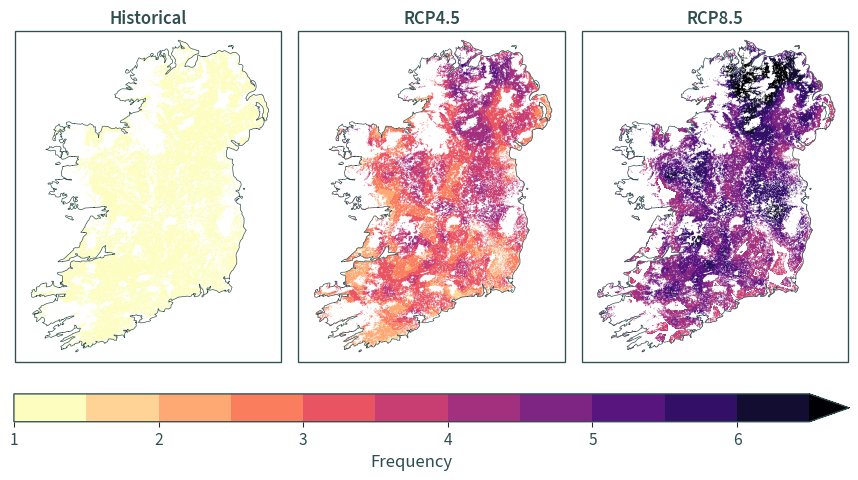

In [10]:
cplt.plot_stats(ds_ec_freq_norm.mean(dim="model", skipna=True)["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Frequency", cmap="magma_r", extend="max")

In [11]:
# ds_ec_freq_reduced = ds_ec_freq.mean(dim="model", skipna=True)

In [ ]:
# cplt.plot_stats(ds_ec_freq_reduced, cplt.projection_eurocordex, mask, ie_bbox, cmap="magma_r")

In [13]:
# cplt.plot_stats(
#     ds_ec_freq_reduced, cplt.projection_eurocordex, cmap="magma_r",
#     levels=sorted([x / x**2 for x in np.arange(2, 9)] + list(np.arange(1, 9)))
# )

#### Intensity of the standing biomass falling below the historical 10th percentile, normalised using the historical 10th percentile

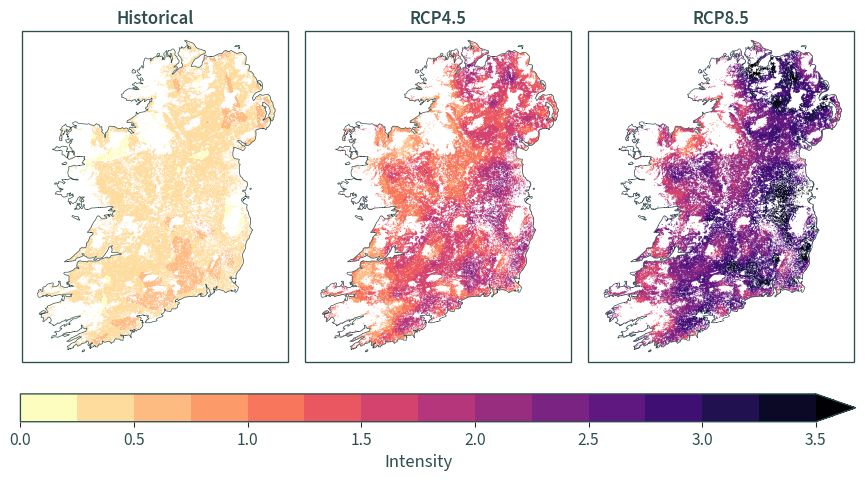

In [14]:
cplt.plot_stats(ds_ec_int.mean(dim="year", skipna=True).mean(dim="model", skipna=True)["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Intensity", cmap="magma_r", extend="max")

#### Intensity of the standing biomass falling below historical 10th percentile, normalised using the standard deviation of the historical period

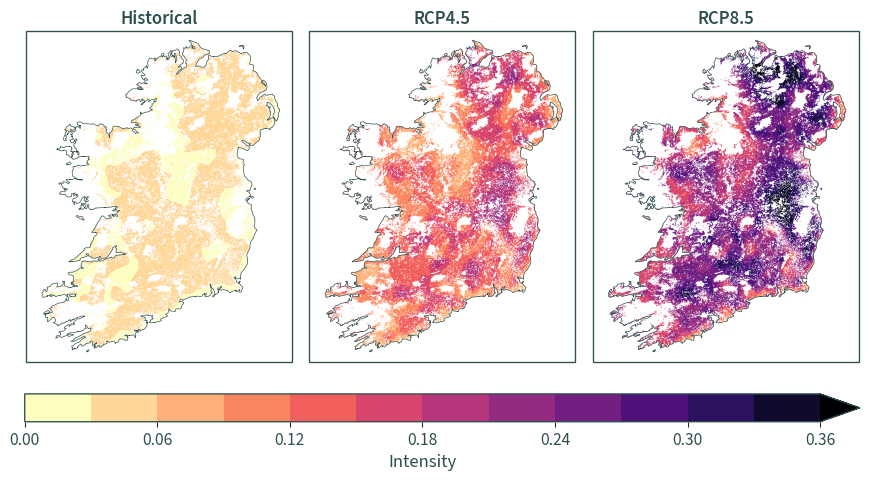

In [15]:
cplt.plot_stats(ds_ec_int_std.mean(dim="year", skipna=True).mean(dim="model", skipna=True)["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Intensity", cmap="magma_r", extend="max")

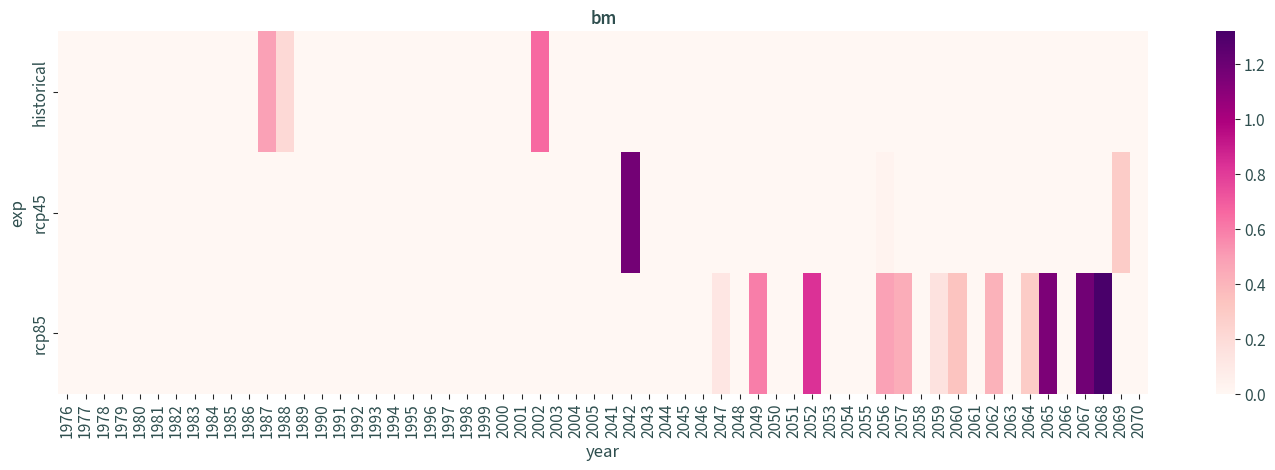

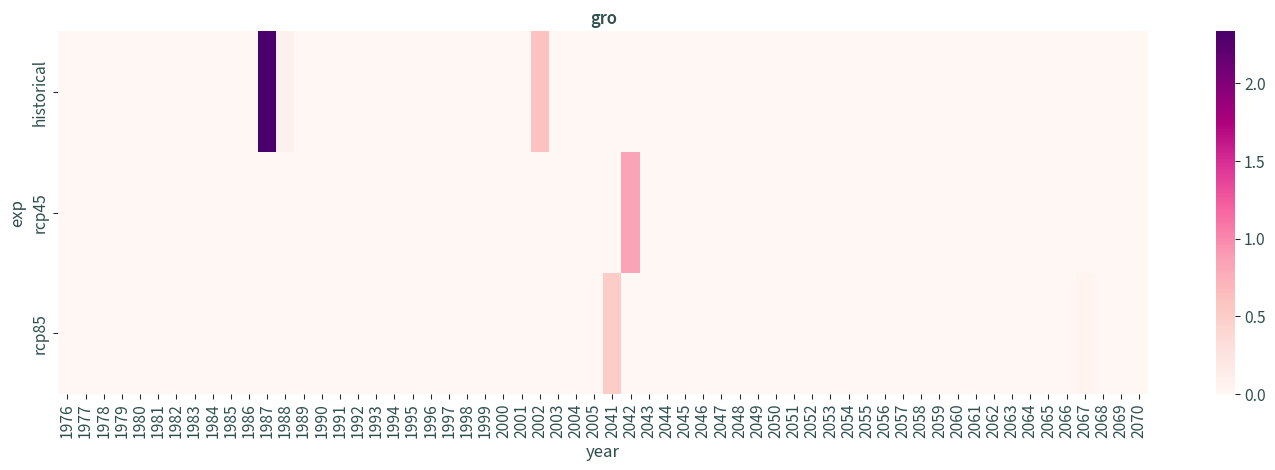

In [14]:
plot_heatmap(ds_ec_int)

### Max

In [18]:
_, ds_ec_freq_max, ds_ec_int_max = cplt.calc_event_frequency_intensity(
    ds_ec, skipna=True, var_avg="max"
)
ds_ec_freq_max = ds_ec_freq_max.drop_vars(["bm", "gro"])
ds_ec_int_max = ds_ec_int_max.drop_vars(["bm", "gro"])

#### Frequency

In [19]:
ds_ec_freq_max_reduced = ds_ec_freq_max.mean(dim="model", skipna=True)

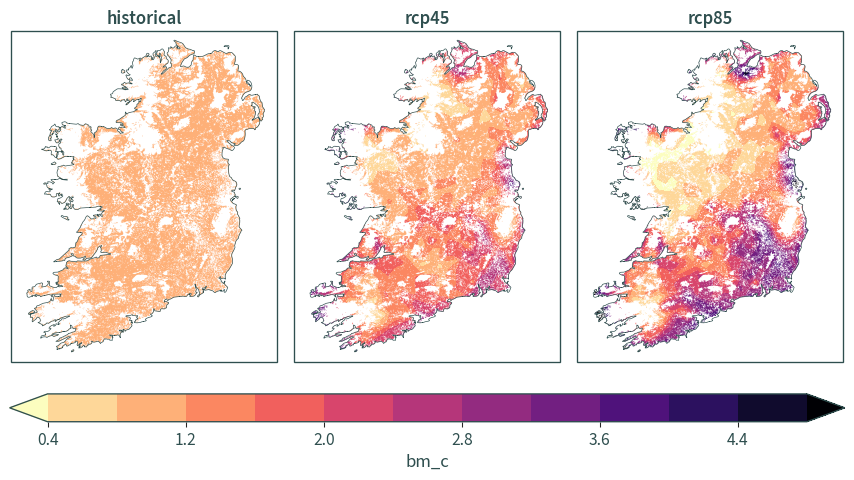

In [20]:
cplt.plot_stats(ds_ec_freq_max_reduced, cplt.projection_eurocordex, mask, ie_bbox, cmap="magma_r")

#### Intensity

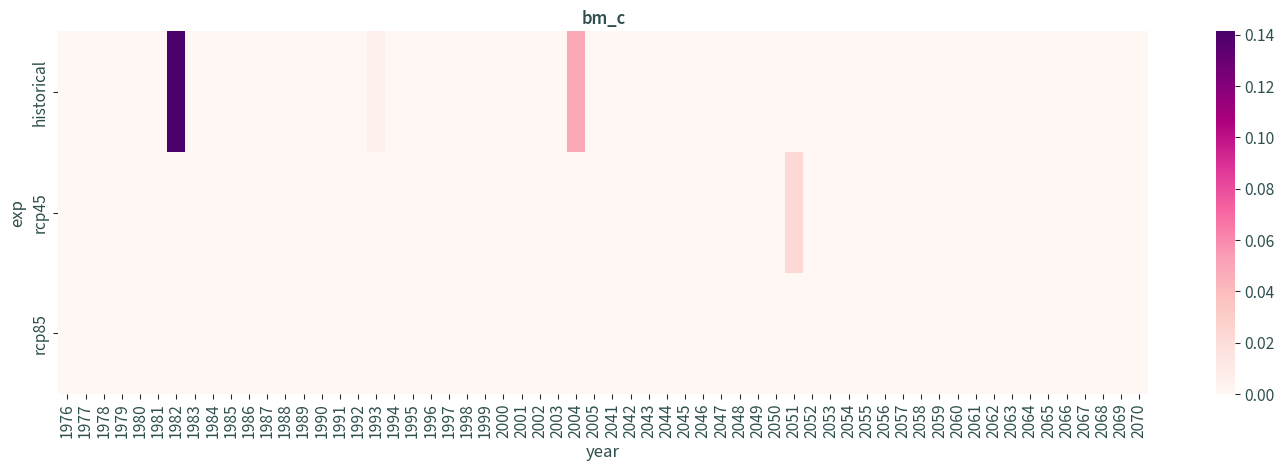

In [21]:
plot_heatmap(ds_ec_int_max)

In [22]:
ds_ec_int_max_reduced = ds_ec_int_max.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

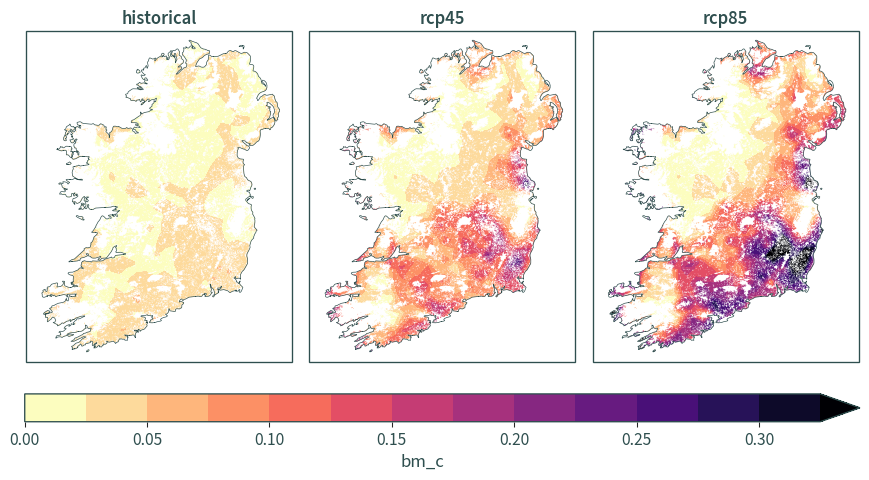

In [23]:
cplt.plot_stats(ds_ec_int_max_reduced, cplt.projection_eurocordex, mask, ie_bbox, cmap="magma_r")

## HiResIreland

In [4]:
ds_hr = cplt.load_all_data("HiResIreland")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


### Mean

In [14]:
ds_hr_anom, ds_hr_freq, ds_hr_freq_norm, ds_hr_int, ds_hr_int_std = cplt.calc_event_frequency_intensity(
    ds_hr, skipna=True
)
# ds_hr_freq = ds_hr_freq.drop_vars(["bm_c"])
# ds_hr_int = ds_hr_int.drop_vars(["bm_c"])

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


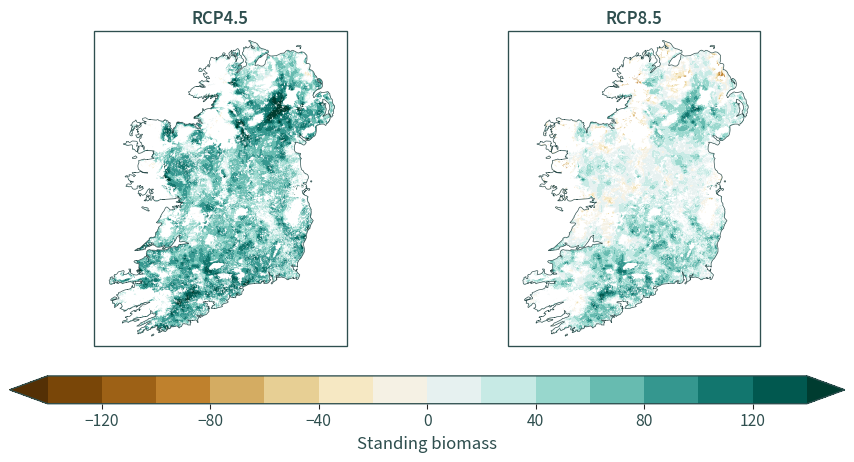

In [6]:
cplt.plot_stats(ds_hr_anom.sel(exp=["rcp45", "rcp85"]).mean(dim="year", skipna=True).mean(dim="model", skipna=True)["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Standing biomass")

#### Frequency

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/si

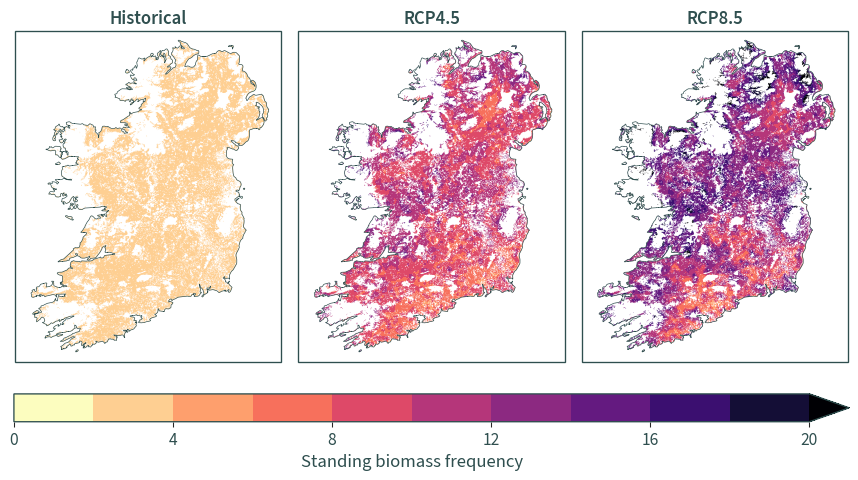

In [7]:
cplt.plot_stats(ds_hr_freq.mean(dim="model", skipna=True)["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Standing biomass frequency", cmap="magma_r", extend="max")

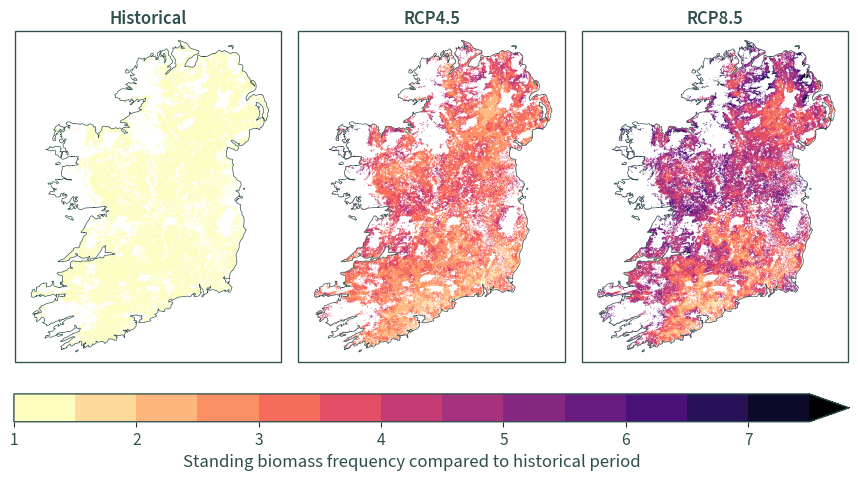

In [8]:
cplt.plot_stats(ds_hr_freq_norm.mean(dim="model", skipna=True)["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Standing biomass frequency compared to historical period", cmap="magma_r", extend="max")

In [6]:
ds_hr_freq_reduced = ds_hr_freq.mean(dim="model", skipna=True)

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/

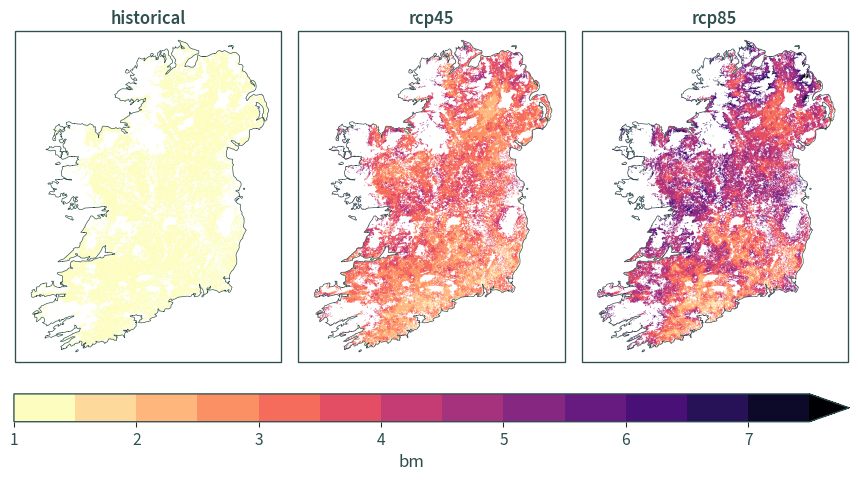

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy

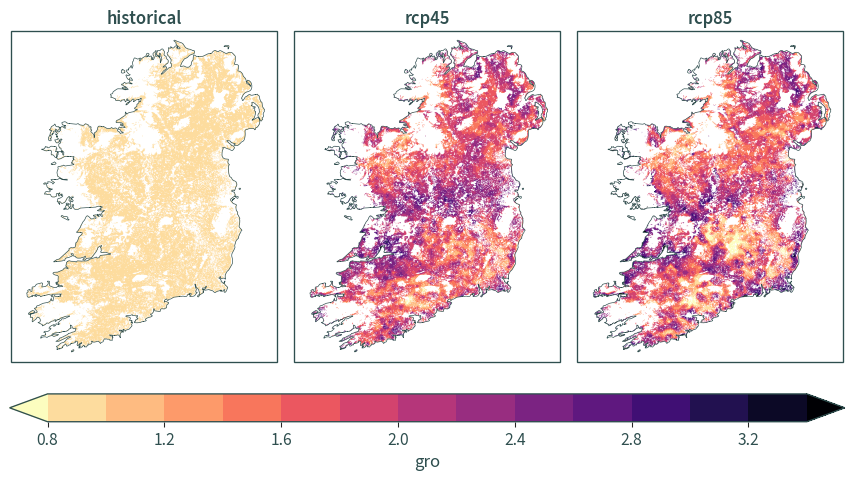

In [7]:
cplt.plot_stats(ds_hr_freq_reduced, cplt.projection_hiresireland, mask, ie_bbox, cmap="magma_r")

#### Intensity

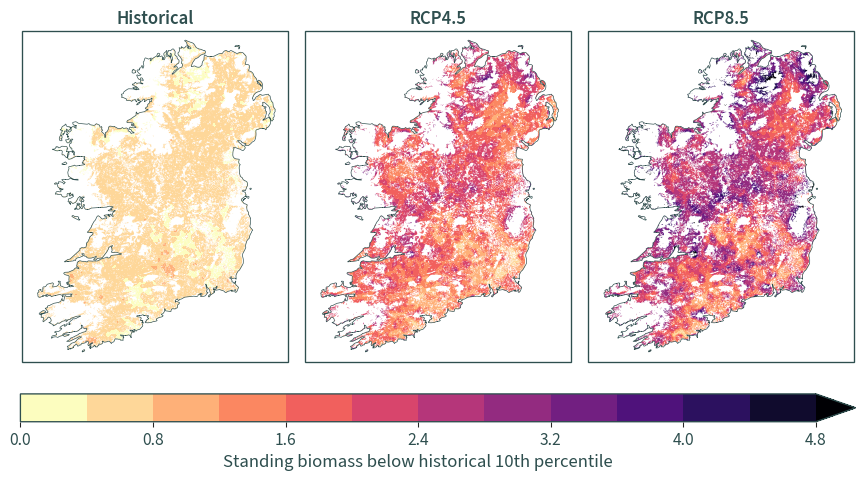

In [15]:
cplt.plot_stats(ds_hr_int.mean(dim="year", skipna=True).mean(dim="model", skipna=True)["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Standing biomass below historical 10th percentile", cmap="magma_r", extend="max")

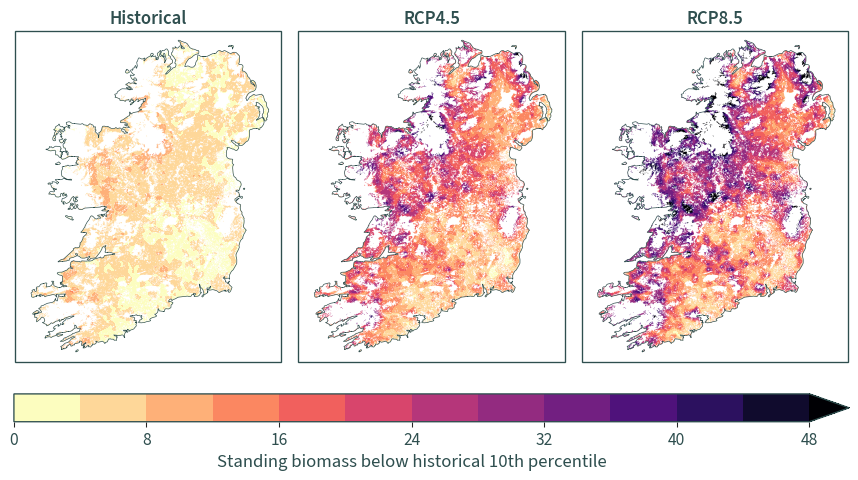

In [9]:
cplt.plot_stats(ds_hr_int.mean(dim="year", skipna=True).mean(dim="model", skipna=True)["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Standing biomass below historical 10th percentile", cmap="magma_r", extend="max")

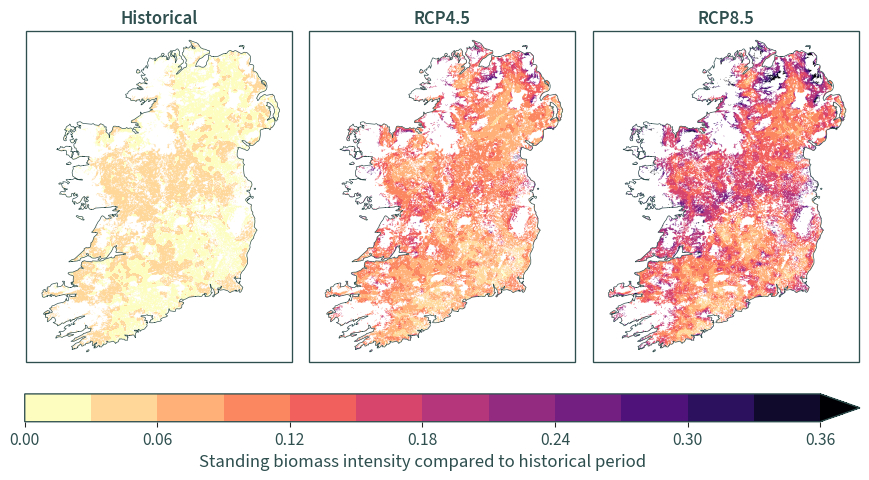

In [10]:
cplt.plot_stats(ds_hr_int_std.mean(dim="year", skipna=True).mean(dim="model", skipna=True)["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Standing biomass intensity compared to historical period", cmap="magma_r", extend="max")

In [ ]:
plot_heatmap(ds_hr_int)

In [9]:
ds_hr_int_reduced = ds_hr_int.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

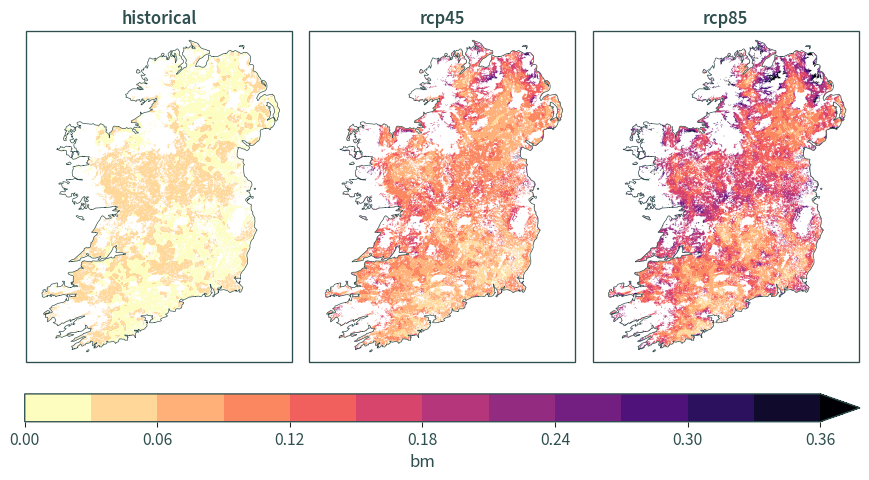

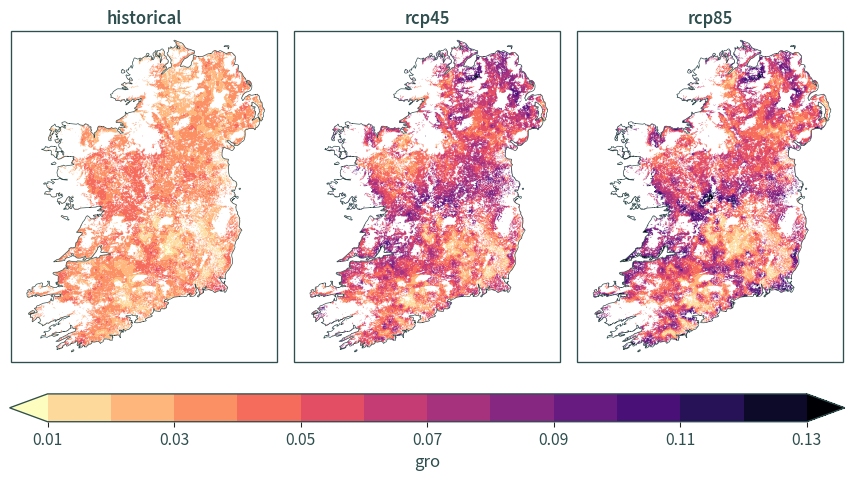

In [10]:
cplt.plot_stats(ds_hr_int_reduced, cplt.projection_hiresireland, mask, ie_bbox, cmap="magma_r")

### Max

In [11]:
_, ds_hr_freq_max, ds_hr_int_max = cplt.calc_event_frequency_intensity(
    ds_hr, skipna=True, var_avg="max"
)
ds_hr_freq_max = ds_hr_freq_max.drop_vars(["bm", "gro"])
ds_hr_int_max = ds_hr_int_max.drop_vars(["bm", "gro"])

#### Frequency

In [12]:
ds_hr_freq_max_reduced = ds_hr_freq_max.mean(dim="model", skipna=True)

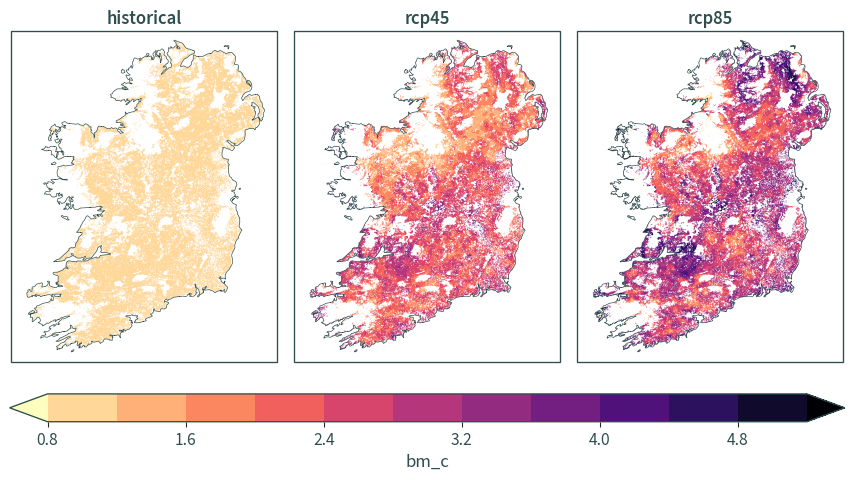

In [13]:
cplt.plot_stats(ds_hr_freq_max_reduced, cplt.projection_hiresireland, mask, ie_bbox, cmap="magma_r")

#### Intensity

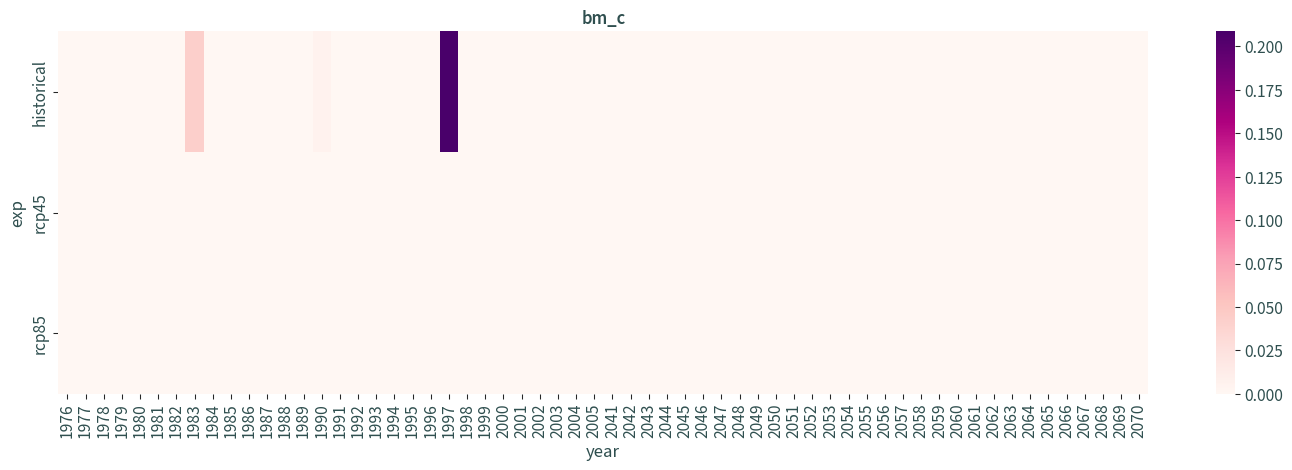

In [14]:
plot_heatmap(ds_hr_int_max)

In [15]:
ds_hr_int_max_reduced = ds_hr_int_max.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

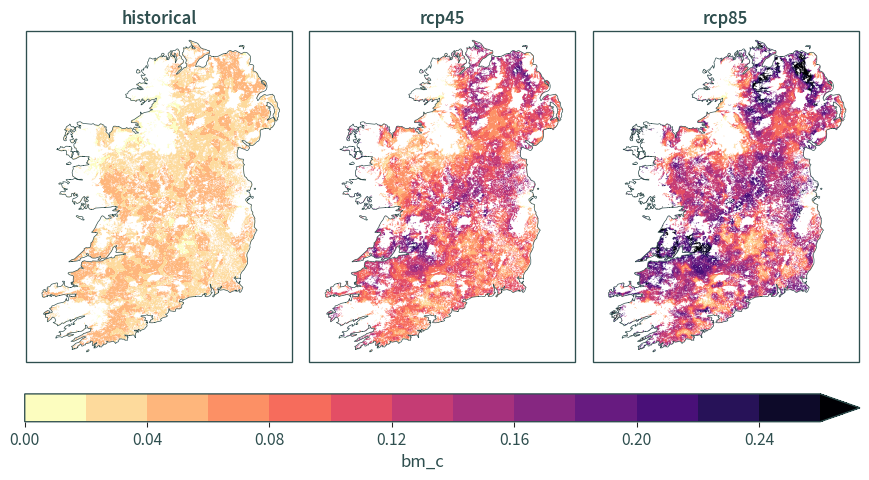

In [16]:
cplt.plot_stats(ds_hr_int_max_reduced, cplt.projection_hiresireland, mask, ie_bbox, cmap="magma_r")